# EDA - Evaluate Student Summaries

# Libro de Variables

## Prompts
- **prompt_id**: 
    - Identificador único para la información del texto que debe de ser resumido.
    - Tipo: String
- **prompt_question**: 
    - Pregunta que se le hace al estudiante para que resuma el texto.
    - Tipo: String
- **prompt_title**: 
    - Un título sobre el texto que debe de ser resumido.
    - Tipo: String
- **prompt_text**: 
    - Texto que debe de ser resumido.
    - Tipo: String


## Summaries
- **student_id**:
    - Identificador único para el estudiante.
    - Tipo: String 
- **prompt_id**:
    - Identificador único para la información del texto que debe de ser resumido. Hace referencia al `prompt_id` de la tabla Prompts.
    - Tipo: String
- **text**:
    - El resumen hecho por el estudiante
    - Tipo: String
- **content**:
    - Un valor numérico que indica la calidad del resumen hecho por el estudiante. (El primer criterio de evaluación o _target_)
    - Tipo: Float
- **wording**:
    - Un valor numérico que indica la calidad de las palabras usadas en el resumen hecho por el estudiante. (El segundo criterio de evaluación o _target_)
    - Tipo: Float

# Análisis de Datos Exploratorio

## Librerías utilizadas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import string

In [51]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Carga de datos

In [52]:
df_prompts = pd.read_csv('../data/prompts_train.csv')
df_prompts.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [53]:
df_summaries = pd.read_csv('../data/summaries_train.csv')
df_summaries.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


## Conversión del tipo de datos

In [54]:
to_string = ['prompt_id', 'prompt_question', 'prompt_title', 'prompt_text']
df_prompts[to_string] = df_prompts[to_string].astype(str)

In [55]:
to_string = ['student_id', 'prompt_id', 'text']
to_float = ['content', 'wording']
df_summaries[to_string] = df_summaries[to_string].astype(str)
df_summaries[to_float] = df_summaries[to_float].astype(float)

## Preprocesamiento de texto

In [56]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [57]:
def remove_stopwords(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

In [58]:
def lemmatize_text(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [59]:
def preprocess_text(text):
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

In [60]:
df_prompts['clean_prompt_text'] = df_prompts['prompt_text'].apply(preprocess_text)

In [61]:
df_summaries['clean_text'] = df_summaries['text'].apply(preprocess_text)

## Análisis de Datos

### Forma de los datos

#### Prompts

In [62]:
print(f"La tabla de Prompts tiene {df_prompts.shape[0]} observaciones y {df_prompts.shape[1]} columnas.")
for col in df_prompts.columns:
    print(f"\t- {col}: {df_prompts[col].dtype}")

La tabla de Prompts tiene 4 observaciones y 5 columnas.
	- prompt_id: object
	- prompt_question: object
	- prompt_title: object
	- prompt_text: object
	- clean_prompt_text: object


#### Summaries

In [63]:
print(f"La tabla de Summaries tiene {df_summaries.shape[0]} observaciones y {df_summaries.shape[1]} columnas.")
for col in df_summaries.columns:
    print(f"\t- {col}: {df_summaries[col].dtype}")

La tabla de Summaries tiene 7165 observaciones y 6 columnas.
	- student_id: object
	- prompt_id: object
	- text: object
	- content: float64
	- wording: float64
	- clean_text: object


### Resumen de los datos
En el conjunto de datos, para este problema en específico, no existen variables categóricas, por lo que no se puede hacer un análisis de frecuencia de las variables. En cuanto a las variables numéricas, se puede analizar la calidad de los textos resumidos por los estudiantes.

In [64]:
df_summaries.describe()

,content,wording
count,7165.000000,7165.000000
mean,-0.014853,-0.063072
std,1.043569,1.036048
min,-1.729859,-1.962614
25%,-0.799545,-0.872720
50%,-0.093814,-0.081769
75%,0.499660,0.503833
max,3.900326,4.310693


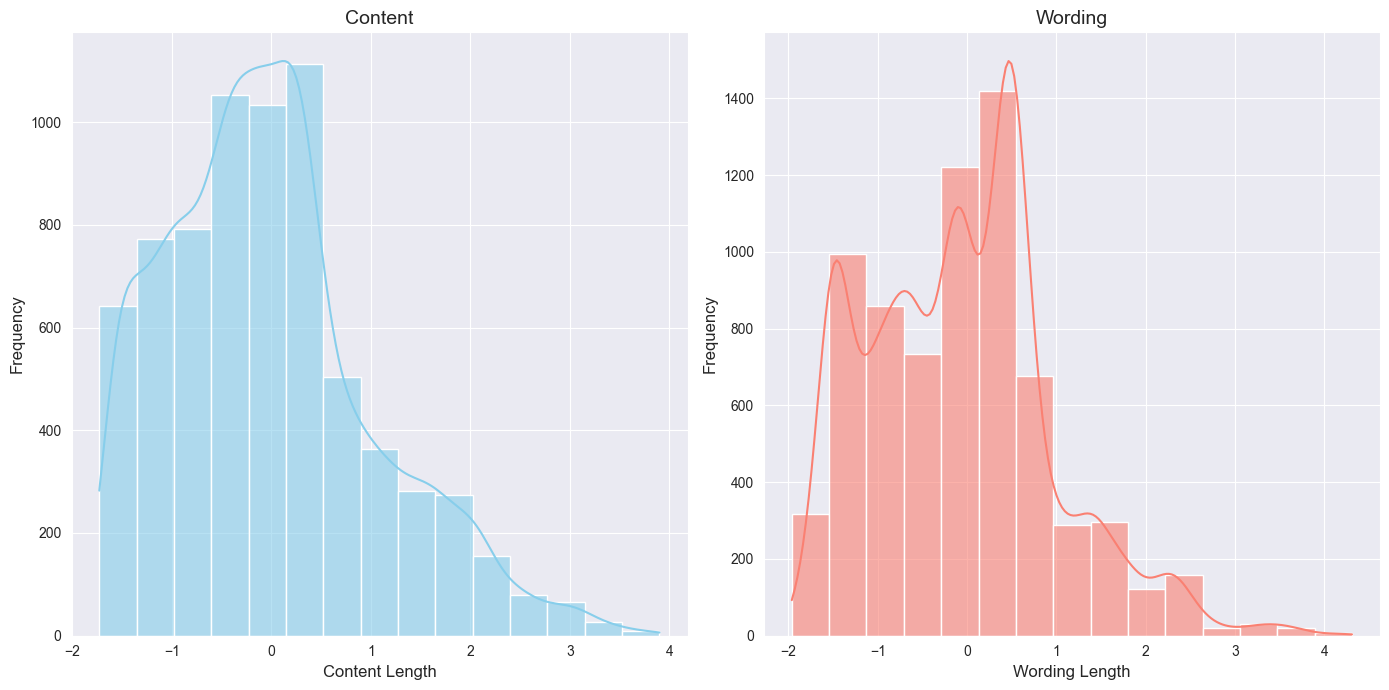

In [65]:
# Increase plot size and adjust subplots
plt.figure(figsize=(14, 7))

# Adjust the first subplot (Content)
plt.subplot(1, 2, 1)
sns.histplot(df_summaries['content'], bins=15, kde=True, color='skyblue', alpha=0.6)
plt.title('Content', fontsize=14)
plt.xlabel('Content Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust the second subplot (Wording)
plt.subplot(1, 2, 2)
sns.histplot(df_summaries['wording'], bins=15, kde=True, color='salmon', alpha=0.6)
plt.title('Wording', fontsize=14)
plt.xlabel('Wording Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

**Content**
- La distribución de las calificaciones de los resúmenes hechos por los estudiantes en cuanto a la calidad del contenido es bastante se encuentra sesgada a la derecha. 
# AGREGAR MÁS DISCUSIÓN ACÁ ABAJO

### Wordcloud

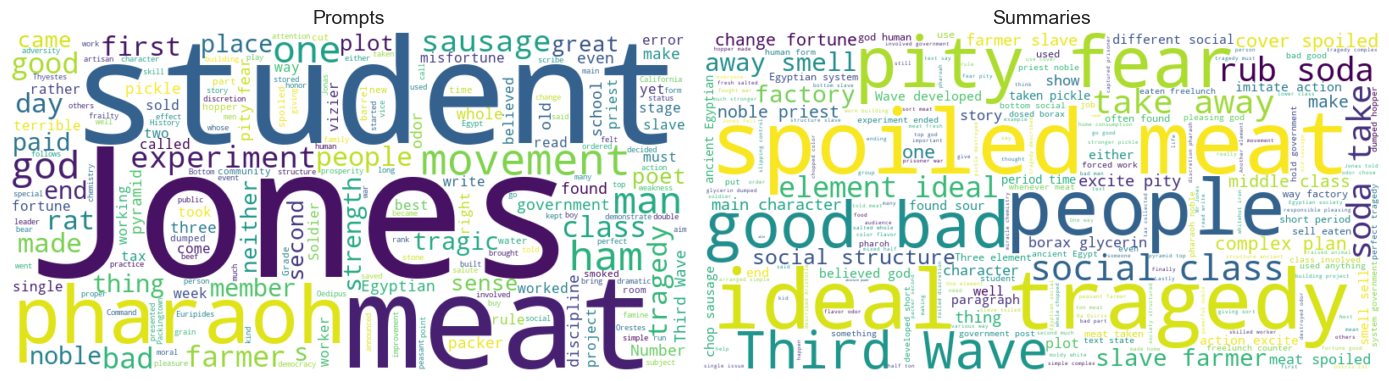

In [66]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_prompts['clean_prompt_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Prompts', fontsize=14)

plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_summaries['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Summaries', fontsize=14)

plt.tight_layout()

plt.show()

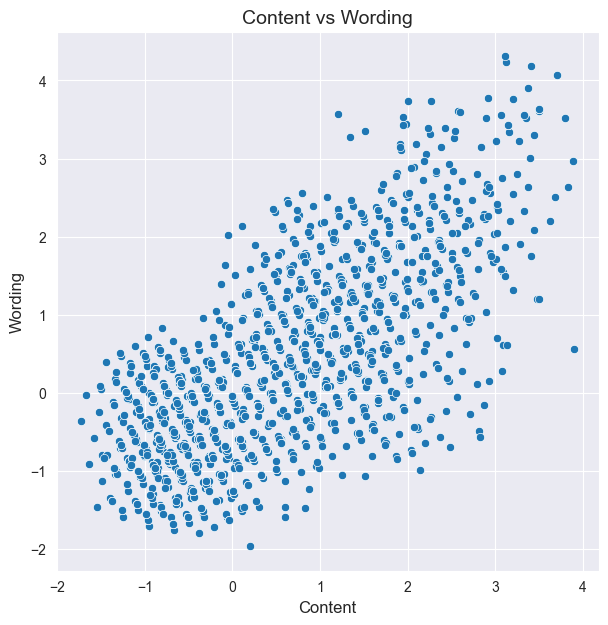

In [67]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='content', y='wording', data=df_summaries)
plt.title('Content vs Wording', fontsize=14)
plt.xlabel('Content', fontsize=12)
plt.ylabel('Wording', fontsize=12)
plt.show()

In [76]:
print("Best Summary:\n")
print(f"Prompt title: {df_prompts.loc[df_prompts['prompt_id'] == df_summaries.loc[df_summaries['content'].idxmax()]['prompt_id']]['prompt_title'].values[0]}")
print(f"Prompt question: {df_prompts.loc[df_prompts['prompt_id'] == df_summaries.loc[df_summaries['content'].idxmax()]['prompt_id']]['prompt_question'].values[0]}\n")
print(df_summaries.loc[df_summaries['content'].idxmax()]['text'])

Best Summary:

Prompt title: On Tragedy
Prompt question: Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.

As described by Aristotle, three elements of an ideal tragedy would be that the plot should feature the downfall of a man who is not completely evil but who has a flaw which causes his downfall, that it should cause fear and pity in the audience, and that it should have a complex plot, but not a plot with two thread that has two different catastrophes for the good and the bad.  Aristotle  believes that the goal of a tragedy is to "imitate actions which excite pity and fear" and argues that in order for the tragedy to accomplish this goal, it should feature the downfall of a hero "who is neiter eminently good and just, yet whose misfortune is brought on not by vice or depravity, but by some error of judgement or frailty." He thinks that if the hero were purely good, his downfall would simply be shocking to the audience, whereas the downfall of a purely 

In [78]:
print("Worst Summary:\n")
print(f"Prompt title: {df_prompts.loc[df_prompts['prompt_id'] == df_summaries.loc[df_summaries['content'].idxmin()]['prompt_id']]['prompt_title'].values[0]}")
print(f"Prompt question: {df_prompts.loc[df_prompts['prompt_id'] == df_summaries.loc[df_summaries['content'].idxmin()]['prompt_id']]['prompt_question'].values[0]}\n")
print(df_summaries.loc[df_summaries['content'].idxmin()]['text'])

Worst Summary:

Prompt title: Egyptian Social Structure
Prompt question: In complete sentences, summarize the structure of the ancient Egyptian system of government. How were different social classes involved in this government? Cite evidence from the text.

The structure of egyptans made a ruler called a pharaoh who had black people as slaves like racism pharaohs make its slaves build things such as pryamids and finding gold to melt and the big thing is that they didn't have a map 
